# 1. TextCNN
- ## TextCNN模型介绍
   卷积神经网络CNN在计算机视觉方向应用很广，解决了CV方向很多的问题。在2014年Yoon Kim针对CNN的输入层做了一些变形，提出了文本分类模型textCNN，与传统图像的CNN网络相比, textCNN 在网络结构上没有任何变化(甚至更加简单了), 卷积层数减少，模型更简单。
   - TextCNN模型demo
 <img src="./images/textcnn3.png" style="height: 60%;width: 60%; position: relative;right:10%">
   - TextCNN模型说明 <br />
       - 这里的卷积神经网络CNN是1D的<br />
       - 卷积核的宽度与词的维度一致，卷积核的移动方向是上下移动<br />
       - 卷积后得到的卷积层的大小为 n - h + 1<br />
           其中： n是词的个数，h是卷积核的大小

   - TextCNN优点
       - 参数少，运行速度快

# 2. IMDB数据集介绍
IMDB数据集有50000条数据集，训练集有25000条，测试集有25000条。数据label分为正负类，每类各占50%。这里采用keras的数据集中的imdb，每条数据已经做好了编码。label为0表示负类，label为1表示正类。

# 3. 搭建TextCNN模型

- 加载imdb数据集

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os
import numpy as np

In [13]:
class TextCNN(object):
    def __init__(self, embedding_size, max_feature, max_length, drop_rate, num_classes):
        self.embedding_size = embedding_size
        self.max_feature = max_feature
        self.max_length = max_length
        self.drop_rate = drop_rate
        self.num_classes = num_classes
    def build_model(self):
        input_x = tf.keras.Input((self.max_length,))
        embedding = tf.keras.layers.Embedding(input_dim=self.max_feature, output_dim=self.embedding_size, 
                                            input_length=self.max_length)(input_x)
        convs = []
        kernel_list = [3, 4, 5]
        for kernel_size in kernel_list:
            conv = tf.keras.layers.Conv1D(filters=64, kernel_size=kernel_size, strides=1,
                                          padding="valid", activation="relu")(embedding)
            pool = tf.keras.layers.GlobalMaxPool1D()(conv)
            convs.append(pool)
        con = tf.keras.layers.Concatenate()(convs)
        fc = tf.keras.layers.Dense(64, activation="relu")(con)
        fc = tf.keras.layers.Dropout(self.drop_rate)(fc)
        output = tf.keras.layers.Dense(self.num_classes, activation="softmax")(fc)
        model = tf.keras.Model(inputs=input_x, outputs=output)
        return model

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=3000)
print("train data shape: ", x_train.shape)
print("train label shape: ", y_train.shape)
print("test data shape: ", x_test.shape)
print("test labbel shape: ", y_test.shape)

train data shape:  (25000,)
train label shape:  (25000,)
test data shape:  (25000,)
test labbel shape:  (25000,)


In [4]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 数据预处理

In [5]:
sen_length = [len(x_train[i]) for i in range(x_train.shape[0])]
sen_length = np.array(sen_length)
lengths = int(np.mean(sen_length) + 2.5 * np.std(sen_length))
precent = np.sum(sen_length < lengths) / len(sen_length)
print(precent, lengths)

0.96356 679


In [6]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=lengths)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=lengths)
print("train data shape: ", x_train.shape)
print("test data shape: ", x_test.shape)

train data shape:  (25000, 679)
test data shape:  (25000, 679)


In [7]:
y_train = tf.one_hot(y_train, 2)
y_test = tf.one_hot(y_test, 2)
print("train label: ", y_train.shape)
print(y_train[:2, :])

train label:  (25000, 2)
tf.Tensor(
[[0. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)


- 搭建textcnn模型

- 训练模型

In [14]:
import os
embedding_size = 300
max_feature = 3000
drop_rate = 0.2
num_class = 2
epoches = 2
batch_size = 32
learning_rate = 0.01

if not os.path.exists("./models/textcnn/"):
    os.mkdir("./models/textcnn/")
if not os.path.exists("./logs_textcnn/"):
    os.mkdir("./logs_textcnn/")
log_dir = "./logs_textcnn/textcnn_event-{}".format(int(time.time()))
model_path = os.path.join("./models/textcnn/textcnn.h5")
my_callbacks = [tf.keras.callbacks.ModelCheckpoint(model_path, verbose=1),
                tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

model = TextCNN(embedding_size, max_feature, lengths, drop_rate, num_class).build_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoches, 
                    callbacks=my_callbacks, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
24992/25000 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5168
Epoch 00001: saving model to ./models/textcnn/textcnn.h5
25000/25000 [==============================] - 206s 8ms/sample - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6902 - val_accuracy: 0.5224
Epoch 2/2
24992/25000 [============================>.] - ETA: 0s - loss: 0.6870 - accuracy: 0.5595
Epoch 00002: saving model to ./models/textcnn/textcnn.h5
25000/25000 [==============================] - 204s 8ms/sample - loss: 0.6870 - accuracy: 0.5595 - val_loss: 0.6835 - val_accuracy: 0.6173


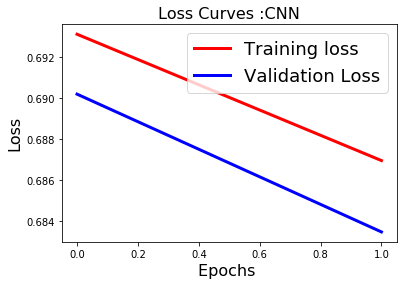

In [15]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
fig1.savefig('./image/loss_textcnn.png')
plt.show()

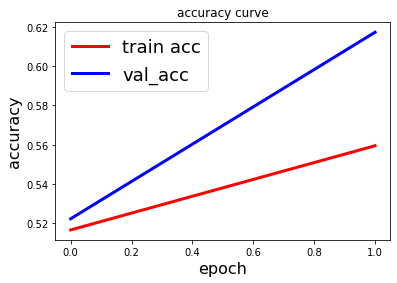

In [16]:
fig2 = plt.figure()
plt.plot(history.history["accuracy"], "r", linewidth=3.0)
plt.plot(history.history["val_accuracy"], "b", linewidth=3.0)
plt.legend(["train acc", "val_acc"], fontsize=18)
plt.xlabel("epoch", fontsize=16)
plt.ylabel("accuracy", fontsize=16)
plt.title("accuracy curve")
plt.savefig("./image/textcnn_accuracy.png")
plt.show()